## A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning andend of your recorded signal. Listen to the new signal and perceptually compare the audio withoriginal.

Original Audio:


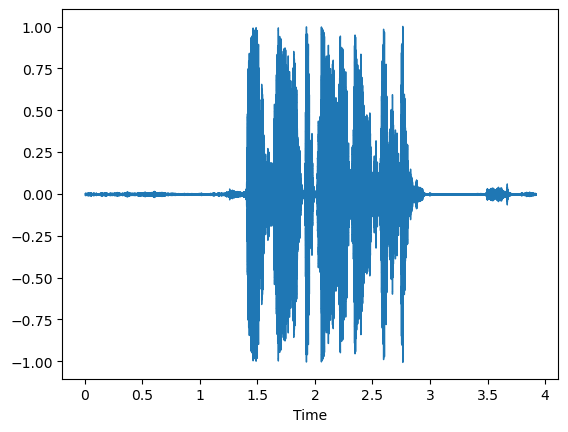

In [2]:
import librosa
import soundfile as sf

file_path = 'q41.wav'
y, sr = librosa.load(file_path)

y_trimmed, index = librosa.effects.trim(y)

trimmed_file_path = 'trimmed_audio.wav'
sf.write(trimmed_file_path, y_trimmed, sr)

original_audio, sr = librosa.load(file_path)
trimmed_audio, sr = librosa.load(trimmed_file_path)

print("Original Audio:")
librosa.display.waveshow(original_audio, sr=sr)


Trimmed Audio:


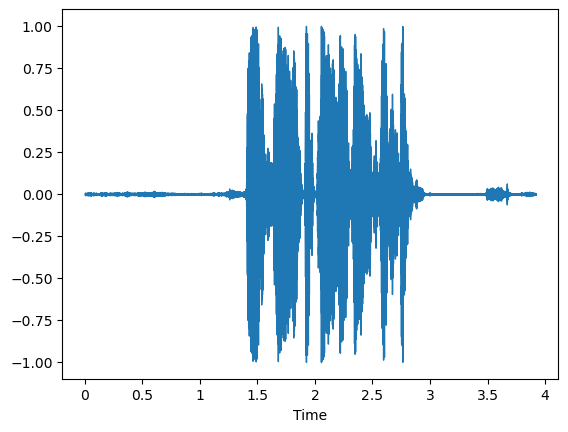

In [3]:
print("Trimmed Audio:")
librosa.display.waveshow(trimmed_audio, sr=sr)


## A2. Use librosa.effects.split() to split the recorded speech with detected silences. Playaround with the top_db parameter and see the effects of split. Listen to the generated signals andobserve the split quality.

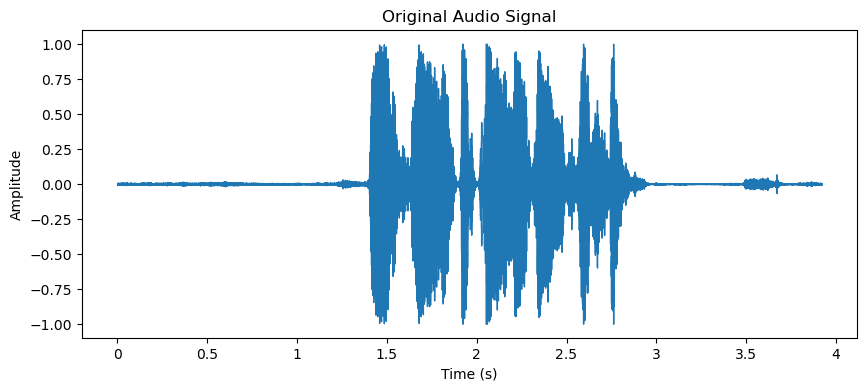

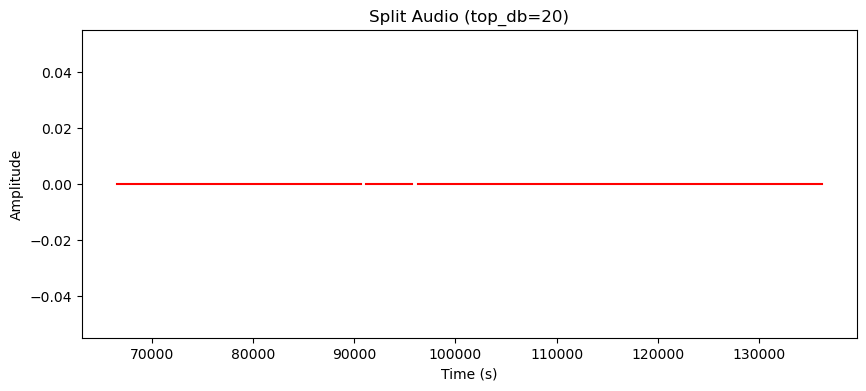

Listening to Split Audio (top_db=20)...
Press Enter to play the next segment...
Press Enter to play the next segment...
Press Enter to play the next segment...


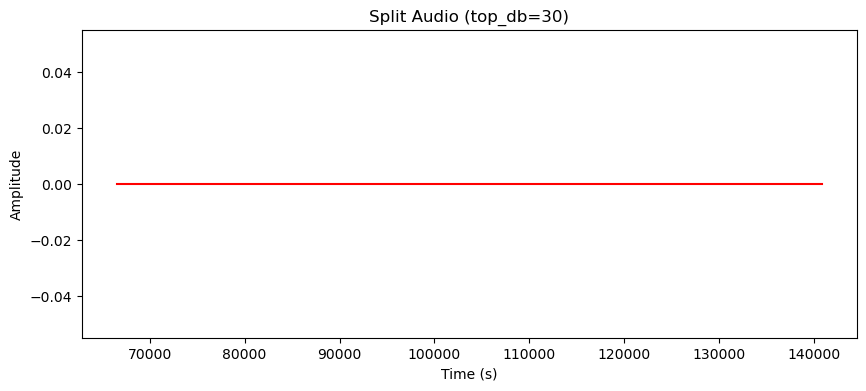

Listening to Split Audio (top_db=30)...
Press Enter to play the next segment...


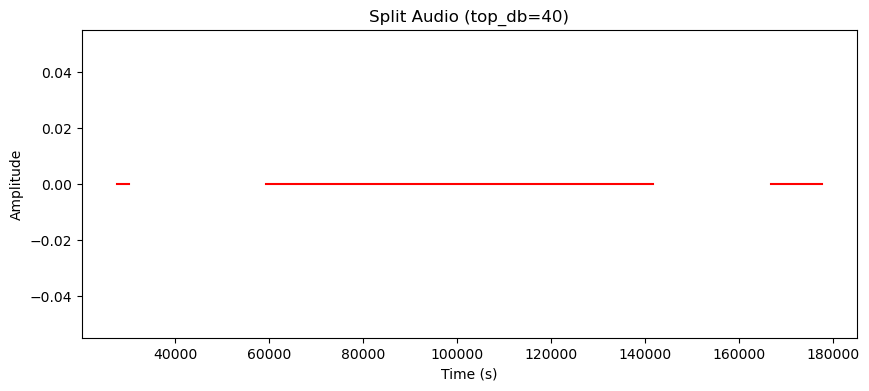

Listening to Split Audio (top_db=40)...
Press Enter to play the next segment...
Press Enter to play the next segment...
Press Enter to play the next segment...
Press Enter to play the next segment...


In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

audio_file = 'q41.wav'
signal, sr = librosa.load(audio_file, sr=None)

# Plot the original audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title('Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

top_db_values = [20, 30, 40]  
for top_db in top_db_values:
    # Split the signal
    intervals = librosa.effects.split(signal, top_db=top_db)

    # Plot the split segments
    plt.figure(figsize=(10, 4))
    for interval in intervals:
        plt.plot(interval, [0, 0], color='red')
    plt.title(f'Split Audio (top_db={top_db})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    print(f"Listening to Split Audio (top_db={top_db})...")
    for interval in intervals:
        start, end = interval
        split_signal = signal[start:end]
        Audio(data=split_signal, rate=sr, autoplay=True)
        input("Press Enter to play the next segment...")